**Data Bootcamp Final Project** Fall 2018

by: Lillian Xue, Francis Santos & Malika Dwarka

Professor Benjamin Zweig

# MANHATTAN RESTAURANT DISTRIBUTION ANALYSIS

## **1. Introduction and Purpose of this Project**

The purpose of this project is to understand the kinds of restaurants existing in certain parts of Manhattan, and assess whether potential relationships exist between these restaurants and the places they are situated in, such as price and income. 

This project will use two datasets: 

* Restaurant data in Manhattan, coming from the Yelp Fusion API. 

* Zip code data in Manhattan, coming from the NYC Census API. 

Using these two datasets, the project will attempt to answer the following questions: 

1) How are restaurants **distributed** across Manhattan?

2) Where are restaurants located according to **price levels** in Manhattan?

3) Does the price level of restaurants in certain areas in Manhattan correlate with **income levels**?






## 2. Data Packages

First, let us provide an outline on the things that we need: 

**(a) We first need to install and import several packages:**

* `pandas` will serve as our main package for **datasets.**

* `matplotlib.pyplot` is an important **visualization package.**

* `numpy` is for **numerical functions.**

* `requests` package is important for accessing the **NYC Open Data API.** 

* `census` is the package where we can extract the most-up-to-date **U.S. census data.** 

* `us` is a package that returns **census data** at a more **local level**. 

* `fiona` is a package required for mapping. 

* `geopandas` serves as our **primary mapping tool**. 

* `shapely.geometry` is useful for **mapping and plotting out shapes**. 

* `seaborn` will help in **regression plot visualization**. 

* `matplotlib.ticket` is for **axes unit formatting** on our plots.
    
    
    
    
    
    



(b) We will also need to get **various API keys** for accessing our zip code data, and our restaurant data: 


* **Census API Key: https://api.census.gov/data/key_signup.html**

* **Yelp Fusion API Key: https://www.yelp.com/developers/v3/manage_app**

Next, we import these respective packages: 

In [1]:
#Import packages for dataframes, plotting, and display
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display, Image
import csv 

#Import packages for NYC Open Data and census incomes
import requests
from census import Census
from us import states

#import mapping tools
import fiona
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
import matplotlib.ticker as mtick

## 3. Getting the NYC map shape

To get the NYC map shape, we first need to obtain an API key to download census zip code data. In the code cell below, we have already downloaded the zipcode data, so we are just assigning a variable (`nyc_shape`) to the file path on our computer: 

In [3]:
#This is Lillian's census api key
api_key = 'c29cf9b11dabb1eb5bda9c2a5ab077d75b9606ab'
cwd = os.getcwd()
nyc_shape = cwd + "/Downloads/ZIP_CODE_040114/ZIP_CODE_040114.shx"

In [4]:
nyc_map = gpd.read_file(nyc_shape)
nyc_map.head(10)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


This is our initial zipcode dataframe. Notice that the "PO_NAME" column equates 'county'. 'New York' under PO_NAME refers to Manhattan.

As we said in our introduction, we **only** want to map out **Manhattan**, we are going to extract from this dataframe the zipcodes within Manhattan (which are under the PO_Name "New York"). We will do this using the `groupby` method:

In [5]:
#We want to map out only Manhattan
boroughs = nyc_map.groupby(["PO_NAME"])
#Let's create a Manhattan map called mmap
mmap = boroughs.get_group("New York")
mmap.head(10)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
21,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1006203.169008225 257345.6566181332,..."
22,10033,0,New York,54284.0,1.615605e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1003020.86467731 256049.1618358046, ..."
24,10040,0,New York,41033.0,1.634074e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1002564.135275811 253724.7731118798,..."
32,10032,0,New York,57606.0,2.315957e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((998935.8528342247 249154.259943217, ..."
36,10031,0,New York,57010.0,1.690215e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1000830.038678393 241801.5896092206,..."
37,10039,0,New York,24234.0,8.419028e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1002403.660203055 243899.2081173807,..."
41,10030,0,New York,26720.0,7.757661e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1001899.622497231 238190.4104798883,..."
42,10027,0,New York,58639.0,2.469528e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((998641.2454838157 236978.8715643883,..."
45,10037,0,New York,16931.0,7.188981e+06,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((1002566.673984647 237849.7907543033,..."
46,10024,0,New York,58521.0,2.287734e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((994210.0381388962 234868.6605617106,..."


Next, we will convert zip codes to integers so we get a list:

In [6]:
#Convert zip codes to integers for joining datasets later
mmap.ZIPCODE = nyc_map.ZIPCODE.astype(int)

#Now we create a list of zipcodes in manhattan in a dataset called mzips
mzips = mmap.ZIPCODE.tolist()
mzips = "".join(str(mzips))
mzips = mzips[1:-1]
mmap.rename(columns={"ZIPCODE": "Zip Code"}, inplace=True)


The next step is for us to do is **setting up the income dataset**. What we mean by the income dataset is that we are trying to find the **median incomes** for each respective zip code. 

* In executing this code, we made reference to **this link:** **https://github.com/datamade/census**


In [7]:
#We need to use the following variables for median income data for each zip code
code = ("NAME","B19013_001E") 
    
#Using Lillian's API key for Census
c = Census("c29cf9b11dabb1eb5bda9c2a5ab077d75b9606ab")

#We will use the up-to-date 2016 median income data from census
manhattan_income = pd.DataFrame(c.acs5.get(
    code, {'for': 'zip code tabulation area:' + mzips }, year=2016))

#rename coded income name
manhattan_income.rename(columns={"B19013_001E": "Income"}, inplace=True)

#Some of the zip codes with negative income figures are P.O. zip codes
manhattan_income = manhattan_income[manhattan_income > 0].dropna()

#Drop and reformat as needed
manhattan_income.drop(['NAME'], axis=1, inplace = True)
manhattan_income.columns = ['Income', 'Zip Code']

#Match the zip code integer type
manhattan_income['Zip Code'] = manhattan_income['Zip Code'].astype(int)

## 4. Generating a DataFrame from income data

After setting up the income dataset, we then need to **merge** this income dataset to the current GeoDataFrame we generated in the previous part, where the zipcode data exists. 

Once done, we will then create a new GeoDataFrame called `mgeo`, which we will use for the remainder for the project.

This is what the subsequent code cell does: 

In [8]:
#Need to make zip codes from the yelp dataset into integers to merge a new dataframe later
#Bring income onto the current GeoDataFrame
mmap = mmap.merge(manhattan_income[['Zip Code','Income']], on = ['Zip Code'])

#Create new GeoDataFrame to be used throughout the remainder of the project
mgeo = mmap[['Zip Code','Income','geometry']]

#Zip code 10162 is a P.O. zip code that erroneously has an income value
mgeo = mgeo[mgeo['Zip Code'].map(abs) != 10162]

mgeo.head(5)

,Zip Code,Income,geometry
0,10034,45643.0,"POLYGON ((1006203.169008225 257345.6566181332,..."
1,10033,46349.0,"POLYGON ((1003020.86467731 256049.1618358046, ..."
2,10040,45811.0,"POLYGON ((1002564.135275811 253724.7731118798,..."
3,10032,40054.0,"POLYGON ((998935.8528342247 249154.259943217, ..."
4,10031,41848.0,"POLYGON ((1000830.038678393 241801.5896092206,..."


## 5. Visualizing zip codes by income

Using this new GeoDataFrame, we will test and see if we can visualize the data into a map, via `matplotlib.pyplot` or `plt`. 

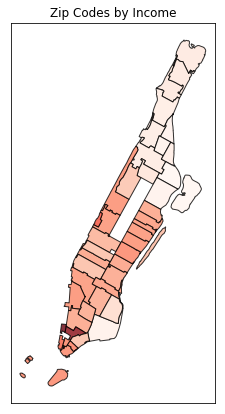

In [9]:
#Create one figure for plotting
fig, ax = plt.subplots(figsize = (5,7))

mgeo.plot(ax = ax, column='Income', edgecolor='black', cmap='Reds', alpha = 0.8)

#Presentation edits
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Zip Codes by Income')
ax.title.set_size(12)

plt.show()

This map demonstrates the varying degrees of median income levels for every respective zip code in Manhattan. 

Darker shades of red represent higher levels of median income. 

## 6. Creating a DataFrame to indicate restaurant price distribution

The next step for us is to extract the **restaurant data** from the **Yelp Fusion API**, and then to construct a DataFrame out of it.

For the purpose of proper flow and organization of this report, the long process of how we used the API key to extract Yelp API data, and how we cleaned up the data, is not shown in this section. It is shown, instead in the **Appendix** section of this report.

For the sake of simplicity, we simply exported a csv file for the final version of our Yelp restaurant data, and imported it again on this notebook for our project. 

This is shown in the code cell below: 

In [10]:
#Read in csv file
yelp = pd.read_csv('file:///Users/Lillian/Downloads/project_v2.csv', encoding = "latin1")

#Turn it into a Dataframe
yelp1 = pd.DataFrame(yelp)
yelp1.shape

(3428, 18)

From these 3,428 datapoints, some of them have null values. To fully clean up our dataframe, we use the **`dropna` method:**

In [11]:
#Cleaning up the rows
yelp1 = yelp1.dropna()
yelp1.shape

(3377, 18)

Next, we try to group all the zip codes in the DataFrame together for convenience: 

In [12]:
#We want to group all the zip codes together for convenience
yelp_zips=yelp1.groupby(["zip_code","price"]).count()
yelp_zips.head(10)

alias  categories  display_phone  distance  id  image_url  \
zip_code price                                                              
10001.0  $          7           7              7         7   7          7   
         $$        28          28             28        28  28         28   
         $$$        5           5              5         5   5          5   
10002.0  $         21          21             21        21  21         21   
         $$        40          40             40        40  40         40   
         $$$        5           5              5         5   5          5   
10003.0  $         25          25             25        25  25         25   
         $$        73          73             73        73  73         73   
         $$$       16          16             16        16  16         16   
         $$$$       6           6              6         6   6          6   

                is_closed  location  name  phone  rating  review_count  \
zip_code price                                                           
10001.0  $              7         7     7      7       7             7   
         $$            28        28    28     28      28            28   
         $$$            5         5     5      5       5             5   
10002.0  $             21        21    21     21      21            21   
         $$            40        40    40     40      40            40   
         $$$            5         5     5      5       5             5   
10003.0  $             25        25    25     25      25            25   
         $$            73        73    73     73      73            73   
         $$$           16        16    16     16      16            16   
         $$$$           6         6     6      6       6             6   

                transactions  url  latitude  longitude  
zip_code price                                          
10001.0  $                 7    7         7          7  
         $$               28   28        28         28  
         $$$               5    5         5          5  
10002.0  $                21   21        21         21  
         $$               40   40        40         40  
         $$$               5    5         5          5  
10003.0  $                25   25        25         25  
         $$               73   73        73         73  
         $$$              16   16        16         16  
         $$$$              6    6         6          6

What we have now in the DataFrame above is a DataFrame with two indices, `zip_code` and `price`. 

All the columns provide the same count for restaurants, so we only really need to **keep one column** that will represent the `Count` of restaurants **in each zip code,** **at a certain price level** (e.g. '$$').  

We can drop the other columns, and we should also rename whatever column we choose to keep as `Count`, for the sake of clarity. 

In [13]:
#Drop irrelevant columns
yelp_zips=yelp_zips[['alias']]

#Rename the alias column to count for clarity
yelp_zips = yelp_zips.rename(columns = {'price':'Price','alias':'Count'})
yelp_zips.head(10)

Count
zip_code price       
10001.0  $          7
         $$        28
         $$$        5
10002.0  $         21
         $$        40
         $$$        5
10003.0  $         25
         $$        73
         $$$       16
         $$$$       6

Next, we want to remove the `zip_code` and `price` as indices, which then allows us to create a **pivot table** for our DataFrame: 

In [14]:
#remove the zip_code and price as indices
yelp_zips.reset_index()
yelp_zips.head(10)
#this allows us to do a pivot table for the dataframe

Count
zip_code price       
10001.0  $          7
         $$        28
         $$$        5
10002.0  $         21
         $$        40
         $$$        5
10003.0  $         25
         $$        73
         $$$       16
         $$$$       6

We are creating a **pivot table** so that we can **transpose** the price level rows `($, $$, $$$, $$$$)` from our original restaurant DataFrame, into columns. 

`price` becomes the **columns** in our table, `Count` becomes the **values** within it, and `zip_code` becomes our **index**.

In [15]:
#Let's do a pivot table
p = yelp_zips.pivot_table(index='zip_code', columns='price', values='Count')

#Some null values still exist so we want to fill in all the NA values for count purposes
p = p.fillna(0)
p.head(5)

#Another point is that the '$$$$' didn't show up in the column as it is a reserved word in Python. So we need to change that to a letter word later

price,$,$$,$$$,$$$$
zip_code,,,,
10001.0,7.0,28.0,5.0,0.0
10002.0,21.0,40.0,5.0,0.0
10003.0,25.0,73.0,16.0,6.0
10004.0,0.0,3.0,2.0,1.0
10005.0,1.0,0.0,0.0,0.0


Our intention with this DataFrame was to eventually **merge it with the `mgeo` DataFrame** we generated back in part (4). 

With this in mind, we noticed at this point a few issues that would pose a problem for merging this DataFrame to the `mgeo` DataFrame: 

* The `zip_code` values in this DataFrame are dtype `float`, while those values in the `mgeo` DataFrame are dtype `int`. 

* The column name for `'zip_code'` in this DataFrame needs to match the same column name for the `mgeo` DataFrame, which is `'Zip Code'`. 

* We also wanted to rename the column names of the price levels from dollar signs (`$, $$, $$$, $$$$`) into words for the sake of clarity, since the `$$$$`, is a reserved word in Python, therefore does not show up in our DataFrame. 

We made these modifications in the following code cell: 

In [16]:
#We want to reset the index so that zip_code can be in the indexes later
restaurants=p.reset_index()

#We also want to make sure zip codes are in integers so that it will match the income dataset when we merge them later
restaurants['zip_code'] = restaurants['zip_code'].astype(int)

#We want to change the column name to 'Zip Code' to match the other dataset for the same reason above
restaurants = restaurants.rename(columns = {'zip_code':'Zip Code'})

#Let's also rename the columns into words for clarity
restaurants = restaurants.rename(columns = {'$':'Cheap', '$$':'Moderate','$$$':'Pricey','$$$$':'Expensive'})

#Now we can set the index again
restaurants = restaurants.set_index(['Zip Code'])

#This is now our dataset!
restaurants.head(3)

price,Cheap,Moderate,Pricey,Expensive
Zip Code,,,,
10001,7.0,28.0,5.0,0.0
10002,21.0,40.0,5.0,0.0
10003,25.0,73.0,16.0,6.0


#### Creating a Total column

We also may want to look at the proportion of restaurants of a certain price level over all restaurants in an area. 

To do so, it is useful to create a `Total` column that represents the total, aggregate number of restaurants for each zip code area: 

In [17]:
restaurants['Total'] = restaurants["Cheap"] + restaurants["Moderate"] + restaurants["Pricey"] + restaurants["Expensive"]
restaurants.head(3)

price,Cheap,Moderate,Pricey,Expensive,Total
Zip Code,,,,,
10001,7.0,28.0,5.0,0.0,40.0
10002,21.0,40.0,5.0,0.0,66.0
10003,25.0,73.0,16.0,6.0,120.0


Now with this `Total` column in our DataFrame, we also thought it would be useful to create a **weighted average** that represents an **average, overall price level** in each zip code. 

To do so, we first get the **proportion of restaurants of each price level** for a zipcode. (e.g. % of `Cheap` restaurants in zip code 10001). 

Then, we assign a numerical value for each price level. The values assigned for each price level were: 

* **Cheap: 1**

* **Moderate: 2**

* **Pricey: 3**

* **Expensive: 4**


Finally, we the multiply proportion of restaurants of a price level to the respective assigned value of that price level. 

The total sum of all those products become our values for the `Average Price Level` column. 


This is shown in the code cell below: 

**Creating an Average Price Level column**: 

In [18]:
#constructing an average price level for correlations
restaurants['Average Price Level'] = (restaurants['Cheap']/restaurants['Total'])* 1+(restaurants['Moderate']/restaurants['Total'])* 2+(restaurants['Pricey']/restaurants['Total'])* 3+(restaurants['Expensive']/restaurants['Total'])* 4

restaurants.head(3)

price,Cheap,Moderate,Pricey,Expensive,Total,Average Price Level
Zip Code,,,,,,
10001,7.0,28.0,5.0,0.0,40.0,1.950000
10002,21.0,40.0,5.0,0.0,66.0,1.757576
10003,25.0,73.0,16.0,6.0,120.0,2.025000


**Note:** We considered evaluating restaurant density on a relative basis, taking an average of the # of restaurants per square mile to give us a fairer look. However, data on the square miles or acres according to zip code was hard to come by, so we decided to forgoe this step.

## 7. Creating a GeoDataFrame and Map Visualizations

The next step is now **merging the two data sets (`mgeo` and `restaurants`) together.** 

We do this by resetting the index of `restaurants` DataFrame, and using the `merge` method on the `mgeo` function: 

In [19]:
#Resetting the index so that 'Zip Code' will be recognized as a column value again, allowing us to merge datasets
restaurants = restaurants.reset_index()
mgeo = mgeo.merge(restaurants[['Zip Code','Cheap','Moderate','Pricey','Expensive', 'Total', 'Average Price Level']], on = ['Zip Code'])

##### Now, let's visualize!

### (a) Let's start generally with the number of restaurants in each zip code:

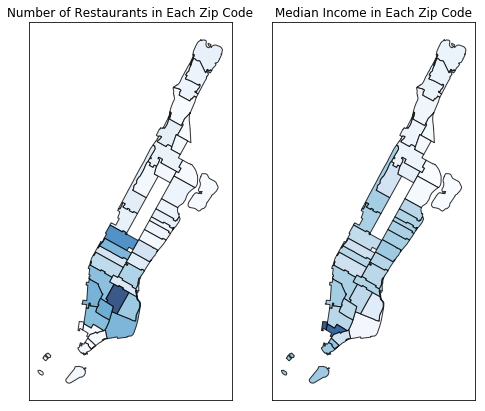

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (8,13))

mgeo.plot(ax = ax[0], column='Total', edgecolor='black', cmap='Blues', alpha = .8)

ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title('Number of Restaurants in Each Zip Code')
ax[0].title.set_size(12)

mgeo.plot(ax = ax[1], column='Income', edgecolor='black', cmap='Blues', alpha = .8)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title('Median Income in Each Zip Code')
ax[1].title.set_size(12)


plt.show()

We can see that generally, darker areas are in lower Manhattan for both graphs. It seems like restaurants and higher income areas are both more concentrated in lower Manhattan.

## *How are restaurants generally distributed across Manhattan?*
#### Observations: Restaurant distribution (all price levels)
* From what we can see in this map, it is clear that most of the restaurants in Manhattan are **much more concentrated** in the **areas below Central Park.**


* In the most general terms, these more concentrated areas can generally be called **Midtown and Downtown Manhattan.**


* The areas **above and along Central Park** (Upper East Side, Upper West Side, Harlem, etc.) appear to have far fewer restaurants. 

### (b) Let's now look at the distribution of the restaurants at various price levels:

In these visualizations, we are also adding the map of **zip codes by income** for the sake of initial, side-by-side, comparison between the distribution of **restaurants of a certain price level** across zip codes, and the **respective income levels** of those zip codes. 

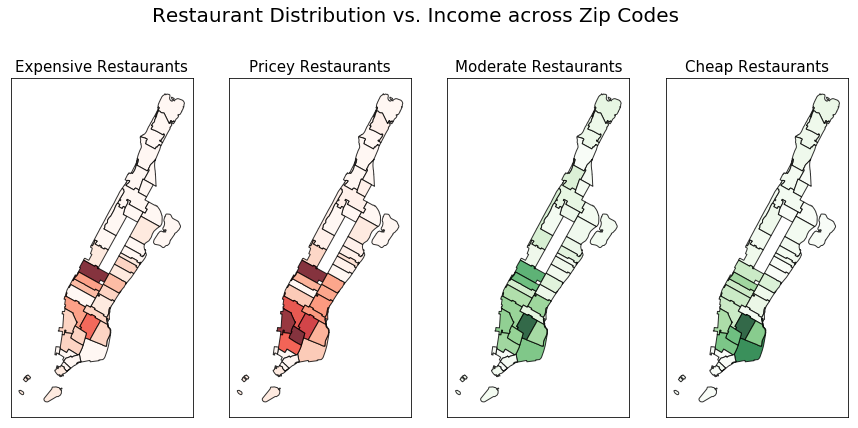

In [21]:
fig, ax = plt.subplots(1,4, figsize = (15,7))

#Let's aggregate geomaps for all
mgeo.plot(ax = ax[0], column='Expensive', edgecolor='black', cmap='Reds', alpha = 0.8)
mgeo.plot(ax = ax[1], column='Pricey', edgecolor='black', cmap='Reds', alpha = 0.8)
mgeo.plot(ax = ax[2], column='Moderate', edgecolor='black', cmap='Greens', alpha = 0.8)
mgeo.plot(ax = ax[3], column='Cheap', edgecolor='black', cmap='Greens', alpha = 0.8)

#Set title for subplots
ax[0].set_title('Expensive Restaurants')
ax[0].title.set_size(15)
ax[1].set_title('Pricey Restaurants')
ax[1].title.set_size(15)
ax[2].set_title('Moderate Restaurants')
ax[2].title.set_size(15)
ax[3].set_title('Cheap Restaurants')
ax[3].title.set_size(15)

ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)


#Set title for the collection
fig.suptitle('Restaurant Distribution vs. Income across Zip Codes',fontsize=20)

plt.show()

*For reference: [Manhattan Zip Code Map](http://www.citidex.com/map/zipco.html)* 

## *Where are restaurants located according to price in Manhattan?*
#### Observations: Higher tier (*in red*) restaurant distribution
* Based on this data, pricey (3 Dollar Sign) restaurants seem to be of a generally greater number as compared to expensive (4 DS restaurants).

* Apart from this, pricey (3 DS) restaurants seem to have a **greater concentration** in the Downtown area, specifically for zip codes **10011, 10012, 10013, 10014 and 10003.**. 

* Another interesting thing to note is that **both pricey (3 dollar sign) and expensive (4 DS)** restaurants are **heavily concentrated** in the zip code **10019**. 

* This zip code, in particular, is where **Central Park South** (and all of its high-class hotels, such as **Plaza Hotel**), **Columbus Circle**, **Hell's Kitchen**, are all situated. 

#### Observations: Lower tier (*in green*) restaurant distribution
* Cheap (1 DS) and moderate (2 DS) restaurants are both **most concentrated** in the zipcode **10003**. 

* This zip code, **10003**, is where **Union Square, NoHo, East Village, and St. Marks' Place** are all located.

* Cheap (1 DS) restaurants also seem to be pretty concentrated in the zip code **10002**. 

* While both cheap and moderate restaurants seem to share the same areas of concentration, one particular area where moderate restaurants seem to be concentrated while cheap restaurants are not, is in the **zipcodes 10019 and 10036. **

* These two zipcodes combined, are where **Times Square**, **Theatre District**, **Hell's Kitchen**, and **Midtown West** are situated.  

### (c) Let's now look at the average price level represented by the restaurants in each zip code:

In this sub-section of visualizations, we also want to add the **zip codes by income** for a basic, side-by-side comparison of **average price levels of restaurants** and **median income levels** in a particular zip code. 

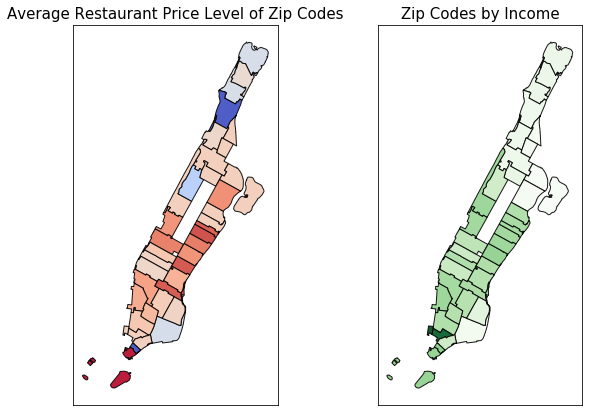

In [22]:
fig, ax = plt.subplots(1,2,figsize = (10,7))

#Left graph is average price level of each zip code
mgeo.plot(ax = ax[0], column='Average Price Level', edgecolor='black', cmap='coolwarm', alpha = 0.9)

#hide axes
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

#create a title
ax[0].set_title('Average Restaurant Price Level of Zip Codes')
ax[0].title.set_size(15)

#Right graph is income according to Zip Codes
mgeo.plot(ax = ax[1], column='Income', edgecolor='black', cmap='Greens', alpha = 0.9)

ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

ax[1].set_title('Zip Codes by Income')
ax[1].title.set_size(15)

plt.show()

* Here, we are using a coolwarm colorscheme to indicate more clearly the weighted average price levels (WAPL), as having two different color schemes allows the map to show a greater variance of average price level
* Blue tones symbolize a lower WAPL, while reds indicate a higher WAPL
* We want to make a callout for two zip codes in particular have a dark blue color (lowest value)

To identify this zip two code, we will do sorting function:

In [39]:
cheapest = mgeo.sort_values(by='Average Price Level', ascending=True)
cheapest.head(2)

,Zip Code,Income,geometry,Cheap,Moderate,Pricey,Expensive,Total,Average Price Level
32,10005,130116.0,"POLYGON ((982595.6794779003 195880.7536295503,...",1.0,0.0,0.0,0.0,1.0,1.0
3,10032,40054.0,"POLYGON ((998935.8528342247 249154.259943217, ...",2.0,0.0,0.0,0.0,2.0,1.0


We see that these zip codes are 10005 and 100032, which are the Wall Street area, and Washington Heights, respectively. These areas don't have as many restaurants.

We want to check whether the darkest red represented was also an extremely skewed value:

In [42]:
priciest = mgeo.sort_values(by='Average Price Level', ascending=False)
priciest.head(1)

,Zip Code,Income,geometry,Cheap,Moderate,Pricey,Expensive,Total,Average Price Level
34,10004,123056.0,"POLYGON ((972696.8446168154 193014.5477478057,...",0.0,3.0,2.0,1.0,6.0,2.666667


The average price is 2.67, not the highest absolute value of 4, so we're good.

## 8. Examining correlations between restaurant distribution and zip code income levels

### (a). Assessing the relationship between the proportion of restaurants of various price levels to income levels

In assessing this potential relationship, it is first important to create a **new DataFrame** that matches with **income data.**

This is what we're doing in the following code cell: 

In [24]:
#Let's make a new DataFrame that combines the restaurant data with income data, matched on zip codes
restaurants1 = restaurants.merge(manhattan_income[['Zip Code','Income']], on = ['Zip Code'])
restaurants1.head(3)

,Zip Code,Cheap,Moderate,Pricey,Expensive,Total,Average Price Level,Income
0,10001,7.0,28.0,5.0,0.0,40.0,1.950000,85168.0
1,10002,21.0,40.0,5.0,0.0,66.0,1.757576,35594.0
2,10003,25.0,73.0,16.0,6.0,120.0,2.025000,100791.0


### Making a scatterplot

Next, using the `polyfit` function from the `numpy` package, we will create and plot a scatterplot.

This scatterplot can help us see if a potential relationship exists between the **proportion of restaurants at a particular price level**, to that respective zip code's **median income level**. 

In this section, we will test this relationship on **all price levels.** 

Let us start with the relationship between the **proportion of expensive (4 DS) restaurants** to **median income**: 

Here's our **hypothesis**:
* We expect to see a ***strong positive correlation*** between the proportion of **expensive** restaurants and the median income level.
* Similarly, we expect to see a ***positively correlated***  between proportion of **pricey** restaurants in a zip code area and median income levels, although we expect it to be less strong than that of expensive restaurants. 
* We expect that there will be a ***strong negative correlation*** between the proportion of **cheap** restaurants and median income levels.
* Lastly, we expect there to be ***little to no correlation*** between the proportion of **moderate** restaurants in a zip code area and median income level.

### Proportion of Expensive to Total Restaurants vs. Median Income: 

Text(0.5,0.98,'Proportion of Expensive to Total Restaurants vs. Median Income')

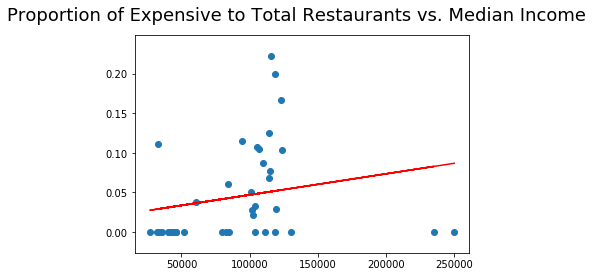

In [25]:
#Let's import a polyfit function from numpy
from numpy.polynomial.polynomial import polyfit
x=restaurants1['Income']
y=restaurants1['Expensive']/restaurants1['Total']

#Let's then poly fit the data
b, m = polyfit(x, y, 1)

#Plot both the fitting results and the original data
fig, axe = plt.subplots()        # create axis object axe
axe.scatter(x,y) 
axe.plot(x, b+ m*x,'r')
fig.suptitle("Proportion of Expensive to Total Restaurants vs. Median Income", fontsize=18)

Interesting. It seems like there is a **slight positive** correlation between median income levels and the proportion of expensive restaurants to total restaurants in a zip code area.

### Proportion of Pricey Restaurants to Median Income: 

Text(0.5,0.98,'Proportion of Pricey Restaurants to Total Restaurants vs. Median Income')

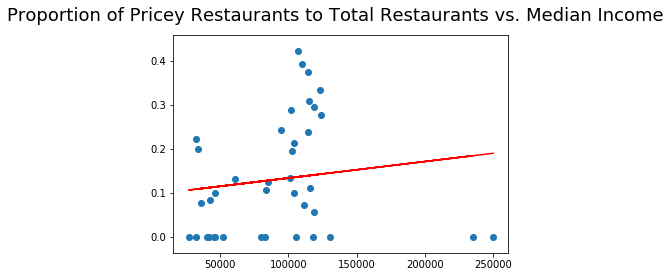

In [26]:
x=restaurants1['Income']
y=restaurants1['Pricey']/restaurants1['Total']

#Let's then poly fit the data
b, m = polyfit(x, y, 1)

#Plot both the fitting results and the original data
fig, axe = plt.subplots()        # create axis object axe
axe.scatter(x,y) 
axe.plot(x, b+ m*x,'r')
fig.suptitle("Proportion of Pricey Restaurants to Total Restaurants vs. Median Income", fontsize=18)

**Observations**: 

* The **polyfit line** in this scatter plot demonstrates a **positive slope**, which may indicate a possible **positive correlation** of the two variables. 


* This means that as the **median income** of a zip code increases, the **proportion of expensive restaurants** may increase in that zip code to some degree.


* However, when we evaluate the points of this graph further, there seems to be a lot of **noise** and **variation** in the data, as seen in that there is one extreme point at the very right of the graph. 


* Another contributor to the noise is that most of the points generally fall in the around the x-value of 100,000, and the respective proportions they exhibit just vary across the y-axis.

### Proportion of Moderate Restaurants to Median Income: 

Text(0.5,0.98,'Proportion of Moderate Restaurants to Total Restaurants vs. Median Income')

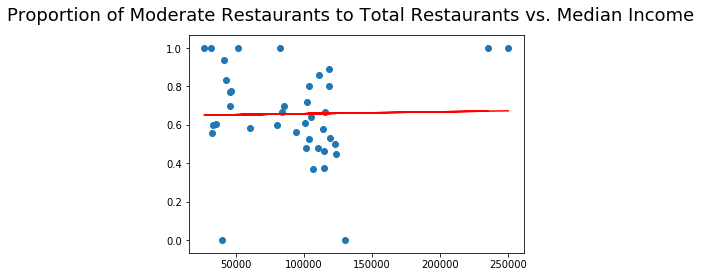

In [27]:
x=restaurants1['Income']
y=restaurants1['Moderate']/restaurants1['Total']

#Let's then poly fit the data
b, m = polyfit(x, y, 1)

#Plot both the fitting results and the original data
fig, axe = plt.subplots()        # create axis object axe
axe.scatter(x,y) 
axe.plot(x, b+ m*x,'r')
fig.suptitle("Proportion of Moderate Restaurants to Total Restaurants vs. Median Income", fontsize=18)

There doesn't seem to be much of a correlation here.

### Proportion of Cheap Restaurants to Median Income: 

Text(0.5,0.98,'Proportion of Cheap to Total Restaurants vs. Median Income')

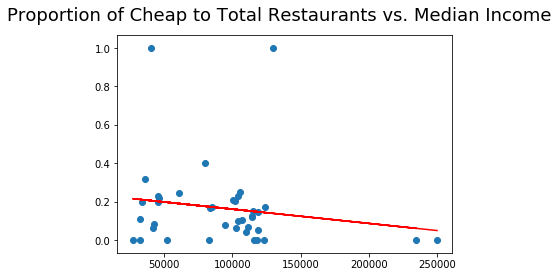

In [28]:
x=restaurants1['Income']
y=restaurants1['Cheap']/restaurants1['Total']

b, m = polyfit(x, y, 1)

fig, axe = plt.subplots()
axe.scatter(x,y) 
axe.plot(x, b+ m*x,'r')
fig.suptitle("Proportion of Cheap to Total Restaurants vs. Median Income", fontsize=18)

**Observations**: 

* The **polyfit line** in this scatter plot demonstrates a **negative slope**, which may indicate a **negative correlation** of the two variables. 


* This means that as the **median income** of a zip code increases, the **proportion of cheap restaurants** may decrease in that zip code to some degree.


* This may demonstrate the phenomenon that **cheap restaurants** are a **snob good**, which means that people will consume less of them, as they earn and reach higher levels of income.

#### Some additional notes:
* This method attempted to assess if a relationship between the **proportion of restaurants of a price level** in a zip code, to that zip code's **median income** level.


* In this method, we want to only highlight **three** scatterplot relationships:
    * The scatterplot between the proportion of **expensive restaurants** to median income 
    * The scatterplot between the proportion of **pricey restaurants** to median income 
    * The scatterplot between the proportion of **cheap restaurants** to median income 
    
    
* We are disregarding the relationships of the **moderate restaurants** primarily becausw rhe slope for the **polyfit line** for the proportion of **moderate restaurants** vs. **median income** scatterplot was **very flat**, which indicates essentially **no correlation** of the two variables. 

### 8(b). Assessing the relationship between the average price level of a zip code and its median income level: 

We are still constructing a scatterplot in this example. 

The only difference is that we are using the `Average Price Level` column as our dependent variable on the y-axis: 

* Compared to method 1 in 8(a), which tests the relationship of proportions of restaurants at various price levels to income, this method tests this relationship of median income with a **weighted average price level.**

Text(0.5,0.98,'Correlation between Income and Average Price Level')

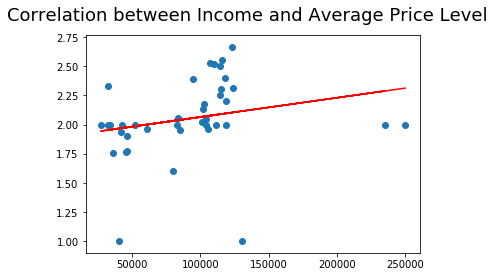

In [29]:
#creating a scatterplot between income and average price level of each zipcode
x=restaurants1['Income']
y=restaurants1['Average Price Level']

#Let's then poly fit the data
b, m = polyfit(x, y, 1)

#Plot both the fitting results and the original data
fig, axe = plt.subplots()        # create axis object axe
axe.scatter(x,y) 
axe.plot(x, b+ m*x,'r')
fig.suptitle("Correlation between Income and Average Price Level", fontsize=18)

**Observations:** 
* From what can be seen in this scatterplot, a **rough positive correlation** may be associated with the median income and average price level of a zip code. 

* This can be seen in the fact that **polyfit** line does exhibit a much sharper slope compared to the other scatterplots shown in this report. 

### 8(c). Assessing the overall correlations of all variables to one another: 

We also wanted to see, in a broader sense, the **overall correlations** the variables in our DataFrame had to one another. 

We did this by constructing a **correlation matrix** using the `seaborn` (`sns`) package: 
This is to assess the various correlations of income to the average price levels and the number (**not the proportion**) of restaurants at various price levels: 

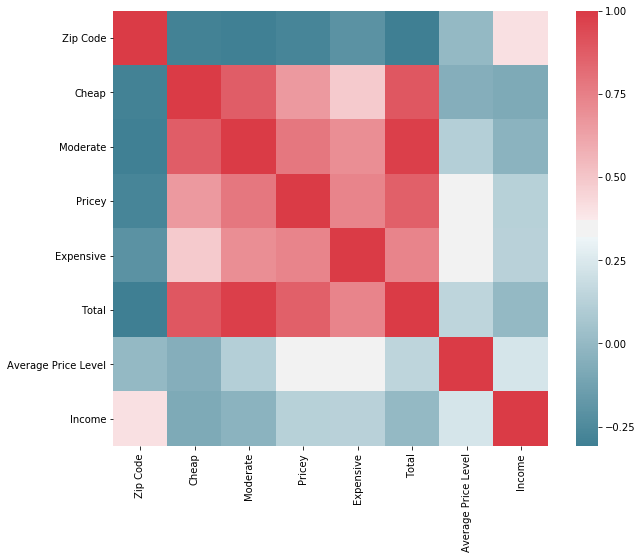

In [30]:
fig, ax = plt.subplots(figsize = (10,8))
corr = restaurants1.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), cmap = sns.diverging_palette(220,10,as_cmap=True),
           square = True,ax=ax)

#### A summary of the relevant factors and their correlation with income: 

In [45]:
res_corr = restaurants1.corr()
#We can disregard certain columns because of duplicates
res_corr = res_corr['Income']

#We can take out certain rows like 'Zip Code' and 'Income'
res_corr[1:7]

Cheap                 -0.081347
Moderate              -0.035155
Pricey                 0.126223
Expensive              0.126657
Total                 -0.001021
Average Price Level    0.230947
Name: Income, dtype: float64

#### What are these two analyses for?

* We constructed a general correlation matrix to assess the various correlations of income to the **average price levels** and the number (**not the proportion**) of restaurants at various price levels: 

## *Does the price level of restaurants in certain areas in Manhattan correspond with income levels?*

**Observations**: 

* From all of the price levels (Cheap, Moderate, Pricey, Expensive), higher-tier restaurants (Pricey, Expensive) seem to possess a **slight, positive correlation** of around 0.13 with median income of a zip code. 


* On the other hand, the lower-tier restaurants (Cheap, Moderate) seem to have a **negative** correlation, but with **how small** those values are (-0.04 & -0.09), the correlation is essentially **non-existent**. 


* What is most interesting, is that among the variables, the one with the **highest correlation** with income is the **average price level**, which is the **weighted average** of the proportion of restaurants to the associated price level of those restaurants. 



## 9. Conclusion

To conclude our data project and report our findings, let's go back to the questions we first established at the start of this paper: 

### (a) *Where are restaurants generally located in Manhattan?*
Restaurants in Manhattan are heavily concentrated in the **areas below Central Park.**
Specifically, **Midtown and Downtown Manhattan.**

### (b) *Where are restaurants located according to price in Manhattan?*
#### Pricey and expensive restaurants (3 DS and up):
Our maps in section 7 demonstrated that both pricey (3 DS) restaurants and expensive (4 DS restaurants) seem to have a **greater concentration** in the Downtown area, most concentrated in zip code 10019, which is **Central Park South**, **Columbus Circle**, and **Hell's Kitchen**. This makes sense given that these areas have many expensive hotels and are associated with high income populations.


#### Cheap and moderate restaurants (1-2 DS)
Cheap (1 DS) and moderate (2 DS) restaurants are both **most concentrated** in the zipcode **10003**, where **Union Square, NoHo, East Village, and St. Marks' Place** are all located.

Specifically, cheap (1 DS) restaurants are also very concentrated in the zip code **10002**, which is **Lower East Side**, where Chinatown is location, which has many smaller, road-side shops.

### (c) *Does the price level of restaurants in certain areas in Manhattan correspond with income levels?*
*Based on the variety of methods we used to attempt to establish a correlation between income and price levels, we believe that there is no **significant relationship or correlation** between the **price levels** of restaurants in a zip code area of Manhattan, to that zip code area's **median income**. *


*In practical terms, this means that the general **income level** of certain areas in Manhattan **do not primarily influence** the type and price level of restaurants in that area.*

### *(d) Limitations of the analysis*
This project was intended to serve as a preliminary look into the distribution of restaurants. While it paints a visual picture of the distribution of restaurants, we were bound by several limitations:

* Yelp open data has a search limit, and not *all* restaurants and cafes are registered as business entities on Yelp. While we continuously changed our search queries to get more data (See Appendix), we still do not have every single restaurant in Manhattan:
    * This may have skewed our dataset, as some areas did not have as many restaurants as others. For instance, zip code 10032 (Washington Heights), only yielded one result from the Yelp API, which was a 1 DS restaurant. 
    * If we would use this method, combined with a larger and more comprehensive dataset in any future inquiries, would allow us to paint a more informed and holistic representation of the distribution of restaurants.
    
    
* We also mentioned in the analysis that it would be useful to add an analysis adjusted by restaurant density. This is because some zip codes are drastically larger than others, therefore doing a density column (# of given price level restaurant/total area of the zip code) would be helpful in plotting the maps. However, the data one zip code area sizes was hard to come by, so we passed on the analysis.


* We think a range of other factors (besides income) could also have implications on restaurant distribution. For instance, the real estate rent could affect average restaurants price levels of the areas. Due to time and space constraints, we left this analysis out, but this could be examined further in the future.

### Thanks for reading!